In [1]:
import pandas as pd
import numpy as np

In [2]:
db = pd.read_parquet('/datadrive/lobby99/kimonaim.parq')
db

,filename,store_id,upload_date,PriceUpdateDate,ItemCode,ItemName,ManufacturerName,ManufactureCountry,ManufacturerItemDescription,UnitQty,Quantity,UnitOfMeasure,ItemPrice,UnitOfMeasurePrice,AllowDiscount,vendor
0,PriceFull7290027600007-002-202111180330,002,2021-11-18,2018-08-10 00:54,11182700954,שעועית שחורה 439 גרם,האנאובר פודס קורפורשיין,US,שעועית שחורה439ג,גרמים,439.00,100 גרם,10.9,2.4800,1,shufersalPrices
1,PriceFull7290027600007-002-202111180330,002,2021-11-18,2019-12-22 10:39,11210000032,"רוטב טבסקו משפחתי 360מ""ל",ניצן,US,רוטב טבסקו,מיליליטרים,360.00,"100 מ""ל",49.9,13.8600,1,shufersalPrices
2,PriceFull7290027600007-002-202111180330,002,2021-11-18,2017-02-07 09:45,11210000094,"רוטב טבסקו 60 מ""ל",ניצן,US,רוטב טבסקו,מיליליטרים,60.00,"100 מ""ל",12.8,21.3300,1,shufersalPrices
3,PriceFull7290027600007-002-202111180330,002,2021-11-18,2020-08-07 00:57,11210618503,טבסקו סקורפיון חריף 60מל,ניצן,US,טבסקו סקורפיון,מיליליטרים,60.00,"100 מ""ל",16.9,28.1700,1,shufersalPrices
4,PriceFull7290027600007-002-202111180330,002,2021-11-18,2018-01-23 08:37,11210698055,"טבסקו סרירצ'ה 566 מ""ל",מקאילהייני,US,רוטב טבסקו,מיליליטרים,566.00,"100 מ""ל",28.9,5.1100,1,shufersalPrices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819249,PriceFull7290803800003-012-202203130745,012,2022-03-13,2016-01-26 16:42:33,7290000889191,אפונה,יצור עצמי,ישראל,אפונה,קילוגרמים,1.00,"ק""ג",39.0,39.0000,1,yohananof1Prices
5819250,PriceFull7290803800003-012-202203130745,012,2022-03-13,2020-10-14 11:33:55,7290000889207,מאפה במילוי בשר,יצור עצמי,ישראל,מאפה במילוי בשר,קילוגרמים,1.00,"ק""ג",69.0,69.0000,1,yohananof1Prices
5819251,PriceFull7290803800003-012-202203130745,012,2022-03-13,2022-02-27 08:19:34,7290018893005,*מבצע* בייגלה שטוח ח,אלקה קו,רומניה,צוקטה,גרמים,160.00,100 גרם,5.9,0.0369,1,yohananof1Prices
5819252,PriceFull7290803800003-012-202203130745,012,2022-03-13,2017-07-23 08:15:42,7290000911014,ארוחת עובד יוחננוף,יצור עצמי,ישראל,ארוחת עובד,יח',1.00,יח',15.0,15.0000,1,yohananof1Prices


In [15]:
df = pd.DataFrame()
df['time']=pd.to_datetime(db['PriceUpdateDate'])
df['time_elapsed'] = ((df['time'] - df['time'].dt.normalize()) / pd.Timedelta('1 second')).astype(int)
df['time']=df['time'].dt.time

In [16]:
df

,time,time_elapsed
0,00:54:00,3240
1,10:39:00,38340
2,09:45:00,35100
3,00:57:00,3420
4,08:37:00,31020
...,...,...
5819249,16:42:33,60153
5819250,11:33:55,41635
5819251,08:19:34,29974
5819252,08:15:42,29742


In [20]:
df['price']=db['ItemPrice']

<AxesSubplot:xlabel='time_elapsed', ylabel='price'>

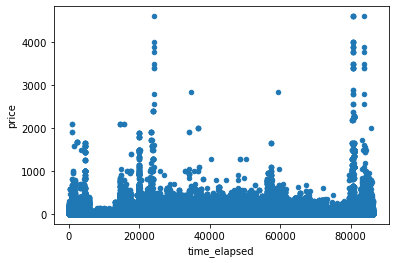

In [21]:
df.plot.scatter(x='time_elapsed',y='price')

In [22]:
from cuml.cluster import KMeans

In [23]:
n_centers = 3

In [25]:
X=df[['time_elapsed','price']]
X

,time_elapsed,price
0,3240,10.9
1,38340,49.9
2,35100,12.8
3,3420,16.9
4,31020,28.9
...,...,...
5819249,60153,39.0
5819250,41635,69.0
5819251,29974,5.9
5819252,29742,15.0


In [26]:
k_means = KMeans(n_clusters=n_centers)
k_means.fit(X)

KMeans()

In [27]:
labels = k_means.predict(X)

In [30]:
df['kmeans']=labels

In [31]:
df

,time,time_elapsed,price,kmeans
0,00:54:00,3240,10.9,1
1,10:39:00,38340,49.9,0
2,09:45:00,35100,12.8,0
3,00:57:00,3420,16.9,1
4,08:37:00,31020,28.9,0
...,...,...,...,...
5819249,16:42:33,60153,39.0,2
5819250,11:33:55,41635,69.0,0
5819251,08:19:34,29974,5.9,0
5819252,08:15:42,29742,15.0,0


<AxesSubplot:xlabel='time_elapsed', ylabel='price'>

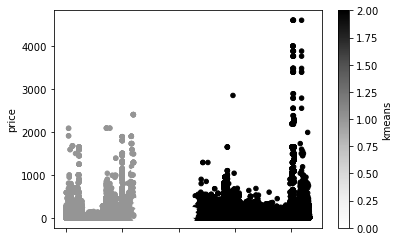

In [32]:
df.plot.scatter(x='time_elapsed',y='price', c='kmeans')